In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/alaaamir/Machine-Learning/main/Assingment%201%20and%202%20Take%202/house_prices_data_training_data.csv')
df.describe()
df.dropna(inplace=True)
df.drop(columns=['id', 'date'],inplace=True)
df = df.convert_dtypes() 
df.apply(pd.to_numeric).dtypes
df = df.astype(float)

In [2]:
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [3]:
def feature_normalize(X, mean=np.zeros(1), std=np.zeros(1)):
    X = np.array(X)
    if len(mean.shape) == 1 or len(std.shape) == 1:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0, ddof=1)


    X = (X - mean)/std
    return X, mean, std

In [4]:

X_norm, meann, sigma = feature_normalize(df)
print('Calculated Mean:', meann)
print('Calculated Standard Deviation:', sigma)


Calculated Mean: [ 5.33074250e+05  3.36296461e+00  2.06160064e+00  2.05182232e+03
  1.57587327e+04  1.43316295e+00  7.83376854e-03  2.42457914e-01
  3.44852492e+00  7.59236624e+00  1.74974232e+03  3.02080004e+02
  1.96728235e+03  9.02535141e+01  9.80780698e+04  4.75602109e+01
 -1.22215112e+02  1.97323674e+03  1.32822707e+04]
Calculated Standard Deviation: [3.64412151e+05 9.34032388e-01 7.58632316e-01 9.02744154e+02
 4.24551425e+04 5.09662990e-01 8.81636686e-02 7.78856958e-01
 6.67039405e-01 1.16949482e+00 8.05427363e+02 4.49443008e+02
 2.79403058e+01 4.14717703e+02 5.41249245e+01 1.39644240e-01
 1.39135290e-01 6.73186870e+02 2.73524150e+04]


In [5]:
def compute_cost(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * ((h-y).T.dot(h-y))
    return J

In [6]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0] 
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

In [7]:
m = df.shape[0]
X = np.hstack((np.ones((m,1)),X_norm))

y = np.array(df.iloc[:, 2].astype(float).values).reshape(-1,1)

theta = np.zeros(shape=(X.shape[1],1))

In [8]:
alpha = [0.3, 0.1, 0.03, 0.01]
colors = ['b','r','g','c']
num_iters = 50
X.shape

(17999, 20)

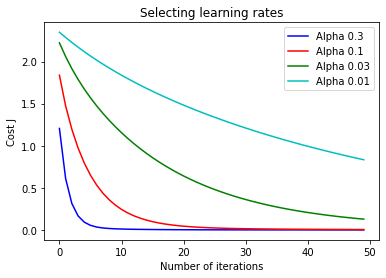

In [9]:
for i in range(0, len(alpha)):
    theta = np.zeros(shape=(X.shape[1],1))
    theta, J_history = gradient_descent(X, y, theta, alpha[i], num_iters)
    plt.plot(range(len(J_history)), J_history, colors[i], label='Alpha {}'.format(alpha[i]))
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.title('Selecting learning rates');
plt.legend()
plt.show()

In [12]:
loops = 300
alpha = 0.2
theta, _ = gradient_descent(X, y, theta, alpha, loops)

print('Thetas from Gradient Descent:')
print(theta)

Thetas from Gradient Descent:
[[ 2.06160064e+00]
 [ 3.01676559e-09]
 [ 1.35329599e-10]
 [ 7.58632313e-01]
 [ 1.50182628e-09]
 [ 1.97207992e-10]
 [ 4.56046594e-10]
 [-6.88944939e-10]
 [-9.56494152e-11]
 [ 5.05310602e-10]
 [-5.22597033e-09]
 [ 1.38450380e-09]
 [ 5.35435418e-10]
 [ 3.80573535e-09]
 [ 7.38976182e-10]
 [ 2.95098961e-10]
 [-1.18872648e-10]
 [-9.82052051e-10]
 [ 8.75010306e-10]
 [-2.83254430e-10]]


In [14]:
bedrooms = (5, - meann[0]/sigma[0])
bathrooms = (3, - meann[1]/sigma[1])
sqft_living = (1150, meann[2]/sigma[2])
sqft_lot = (7450, meann[3]/sigma[3])
floors = (2, meann[4]/sigma[4])
waterfront = (0, meann[5]/sigma[5])
view = (2, meann[6]/sigma[6])
condition = (2, meann[7]/sigma[7])
grade = (10, meann[8]/sigma[8])
sqft_above = (2000, meann[9]/sigma[9])
sqft_basement = (430, meann[10]/sigma[10])
yr_built = (2009, meann[11]/sigma[11])
yr_renovated = (1000, meann[12]/sigma[12])
zipcode = (9813, meann[13]/sigma[13])
lat = (47.6370, meann[14]/sigma[14])
long_ = (-122.250, meann[15]/sigma[15])
sqft_living15 = (1410, meann[16]/sigma[16])
sqft_lot15 = (8750, meann[17]/sigma[17])

y_prediction = theta[0] + theta[1]*bedrooms + theta[2]*bathrooms + theta[3]*sqft_living + theta[4]*sqft_lot + theta[5]*floors + theta[6]*waterfront + theta[7]*view + theta[8]*condition + theta[9]*grade + theta[10]*sqft_above + theta[11]*sqft_basement + theta[12]*yr_built + theta[13]*yr_renovated + theta[14]*zipcode + theta[15]*lat + theta[16]*long_ + theta[17]*sqft_living15 + theta[18]*sqft_lot15
print("Price of a 1650 ft^2 House with 3 bedrooms:")
y_prediction[0]

Price of a 1650 ft^2 House with 3 bedrooms:


874.4887798251718